In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

First, let us build a function to create random periodic signals.

In [21]:
def gen_periodic_data(x, period=1, amplitude=1, phase=0, noise=0):
    '''Generate periodic data given the function inputs
    
    y = A*cos(x/p - phase) + noise
    
    Parameters
    ----------
    x : array-like
        input values to evaluate the array
    
    period : float (default=1)
        period of the periodic signal
    
    amplitude : float (default=1)
        amplitude of the periodic signal
    
    phase : float (default=0)
        phase offset of the periodic signal
    
    noise : float (default=0)
        variance of the noise term added to the periodic signal
    
    Returns
    -------
    y : array-like
        Periodic signal evaluated at all points x
    '''
    
    y = amplitude*np.cos(2*np.pi*x/(period) - phase) + np.random.normal(0, np.sqrt(noise), size=len(x))
    return y

Generate a signal with $A = 2$ and $p = \pi$ over a regular grid between 0 and 10. Plot your results to confirm your code from the previous problem. 

<IPython.core.display.Javascript object>


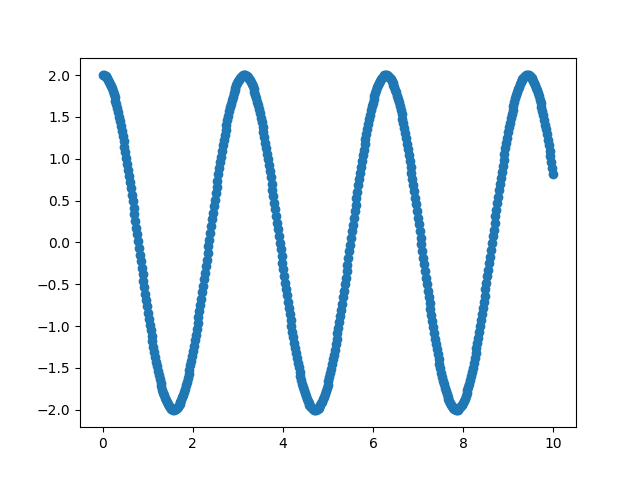

In [19]:
x = np.linspace(0,10,500)
y = gen_periodic_data(x, period=np.pi,amplitude=2)

plt.scatter(x,y)

Now, generate a function to plot phase folded data which takes x, y, period, and y uncertainties as input.

In [26]:
def phase_plot(x, y, period, y_unc = None):
    
    phases = (x/period) % 1
    if y_unc == None:
        y_unc = np.zeros_like(x)
    
    plot_order = np.argsort(phases)
    plt.errorbar(phases[plot_order], y[plot_order], y_unc[plot_order])
    plt.xlabel("phase")
    plt.ylabel("signal")

Plot the phase folded light curve for the previously generated data.

<IPython.core.display.Javascript object>


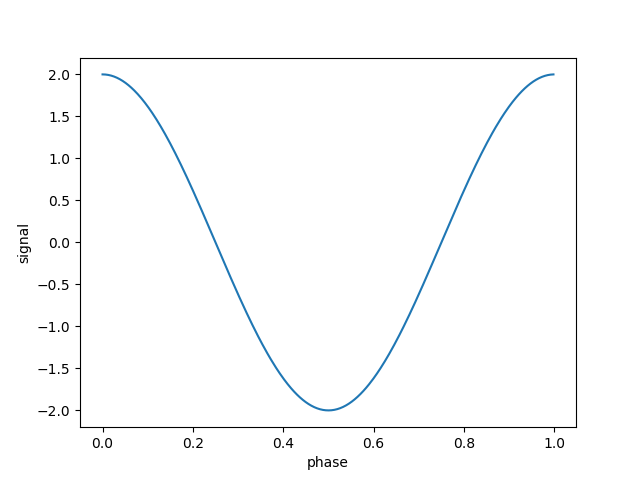

In [27]:
phase_plot(x, y, np.pi)

Now that we have those two basic steps out of the way